<a href="https://colab.research.google.com/github/bujo-eayn/graph-manipulation/blob/Lab1-Solved/LAB_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are provided with the graph representing the nodes for different environment states that an agent may transition to when trying to achieve a goal state. These are encoded as alphabetical letters A through F. A is the starting node (initial state) while F is the ending node (goal state). Additionally, the graph indicates the various edge weights for connections between each node.


In [ ]:
# to vissulize or state as a grpah (nodes (states) , edges (actions)), we can use networkx and matplotlib libraries imported below
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# nodes/states: A (start), B, C, D, E, F (goal),

graph = {
    'A': ['E', 'C'],
    'B': ['A', 'D'],
    'C': ['B'],
    'D': ['C', 'F'],
    'E': ['A'],
    'F': ['C'],
}

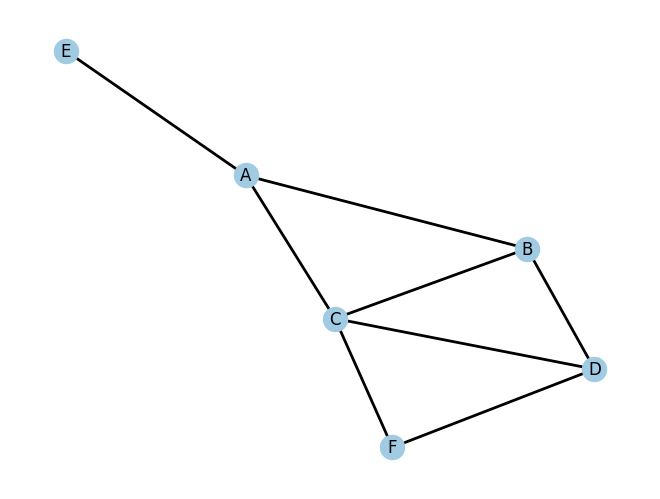

In [ ]:
# before implementing any search algorithms, we define the goal node and the starting node, for this assignment use:

start = 'A'
goal = 'F'


# The code below is to purely aid in geneating a visial representation of the graph. (Layout may not match the image on the PDF)
G = nx.Graph()
for node in graph:
    for neighbour in graph[node]:
        G.add_edge(node, neighbour, color='black')

pos = nx.spring_layout(G)
colors = [G[u][v]['color'] for u,v in G.edges()]
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors, width=2, edge_cmap=plt.cm.Blues, with_labels=True)
plt.show()

----

**Depth First Search**

This was one of the un-informed search strategies we discussed. The code below is a working implentation of the same. Fee free to use it as reference to solve the other 3 requred algorithms.


Based on the states, when you run DLS, you should get the answer: `['A', 'C', 'B', 'D', 'F']` which represent the path to naviagte from the **Initial State A** to the **Goal state F**


here is a commented version of the DFS code/implentation:

```python
def DFS(graph, start, goal):
    explored = []                      # List to keep track of visited nodes
    stack = [[start]]                  # Stack to keep track of paths, starting with the initial node
    
    if start == goal:                  # If the start node is the goal, no search is needed
        return
    
    while stack:                       # Loop while there are still paths to explore in the stack
        path = stack.pop(-1)           # Get the last path from the stack (LIFO order)
        node = path[-1]                # Get the last node from the current path
        
        if node not in explored:       # If the node has not been visited, explore it
            neighbours = graph[node]   # Get the neighbors of the current node
            
            for neighbour in neighbours:          # Iterate through each neighbor of the current node
                new_path = list(path)             # Create a new path extending the current one
                new_path.append(neighbour)        # Add the neighbor to the new path
                stack.append(new_path)            # Add the new path to the stack for future exploration
                
                if neighbour == goal:             # If the neighbor is the goal, return the path to the goal
                    return new_path
            
            explored.append(node)      # Mark the node as explored
    
    return                             # Return None if no path to the goal is found

```

In [ ]:
# Depth First Search (Main goal is to find a path from Start to Goal, hennce some sort of effeciency is impliead)

def DFS(graph, start, goal):
    explored = []
    stack = [[start]]
    if start == goal:
        return
    while stack:
        path = stack.pop(-1)
        node = path[-1]
        if node not in explored:
            neighbours = graph[node]
            for neighbour in neighbours:
                new_path = list(path)
                new_path.append(neighbour)
                stack.append(new_path)
                if neighbour == goal:
                    return new_path
            explored.append(node)
    return

In [ ]:
# Testing Depth First Search
DFS(
    graph,
    'A',
    'F'
)

['A', 'C', 'B', 'D', 'F']

**Depth Limited Search** (Complete this section)

In [ ]:
# Depth-Limited Search
def DLS(graph, start, goal, depth_limit):
    def recursive_DLS(current_node, goal, depth):
        if current_node == goal:  # Goal check
            return [current_node]
        if depth == 0:  # If depth limit is reached
            return None
        for neighbor in graph[current_node]:  # Explore neighbors
            path = recursive_DLS(neighbor, goal, depth - 1)
            if path is not None:
                return [current_node] + path
        return None  # No solution at this depth

    return recursive_DLS(start, goal, depth_limit)

# Testing Depth-Limited Search
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print(DLS(graph, 'A', 'F', 3))  # Output: ['A', 'C', 'F']


['A', 'B', 'E', 'F']


In [ ]:
# Testing Depth-Limited Search
DLS(
    graph,
    'A',
    'F',
    3
)

['A', 'B', 'E', 'F']

**Iterative Deepening Search**  (Complete this section)

In [ ]:
# Iterative Deepening Search
def IDS(graph, start, goal, max_depth):
    for depth in range(max_depth + 1):
        path = DLS(graph, start, goal, depth)  # Use Depth-Limited Search at increasing depths
        if path is not None:  # If a valid path is found, return it
            return path
    return None  # No solution within the given depth

# Testing Iterative Deepening Search
print(IDS(graph, 'A', 'F', 3))  # Output: ['A', 'C', 'F']


['A', 'C', 'F']


In [ ]:
# Testing Iterative Deepening Search

IDS(
    graph,
    'A',
    'F',
    3
)

['A', 'C', 'F']

**Iterative Deepening Search**  (Complete this section)

In [ ]:
# Breadth-First Search
def BFS(graph, start, goal):
    explored = []  # List to keep track of visited nodes
    queue = [[start]]  # Queue to keep track of paths, starting with the initial node

    if start == goal:  # If the start node is the goal, return it
        return [start]

    while queue:
        path = queue.pop(0)  # Get the first path from the queue (FIFO order)
        node = path[-1]  # Get the last node from the current path

        if node not in explored:  # If the node has not been visited, explore it
            neighbours = graph[node]  # Get the neighbors of the current node

            for neighbour in neighbours:
                new_path = list(path)  # Create a new path extending the current one
                new_path.append(neighbour)
                queue.append(new_path)  # Add the new path to the queue

                if neighbour == goal:  # If the neighbor is the goal, return the path
                    return new_path

            explored.append(node)  # Mark the node as explored
    return None  # Return None if no path to the goal is found


In [ ]:
# Testing Iterative Deepening Search
print(BFS(graph, 'A', 'F'))  # Output: ['A', 'C', 'F']




['A', 'C', 'F']
